In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('train_2021.csv')

In [5]:
df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,...,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,...,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


In [6]:
df.columns

Index(['claim_number', 'age_of_driver', 'gender', 'marital_status',
       'safty_rating', 'annual_income', 'high_education_ind',
       'address_change_ind', 'living_status', 'zip_code', 'claim_date',
       'claim_day_of_week', 'accident_site', 'past_num_of_claims',
       'witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'fraud'],
      dtype='object')

In [7]:
df.shape

(17998, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17998 non-null  int64  
 1   age_of_driver            17998 non-null  int64  
 2   gender                   17998 non-null  object 
 3   marital_status           17993 non-null  float64
 4   safty_rating             17998 non-null  int64  
 5   annual_income            17998 non-null  int64  
 6   high_education_ind       17998 non-null  int64  
 7   address_change_ind       17998 non-null  int64  
 8   living_status            17998 non-null  object 
 9   zip_code                 17998 non-null  int64  
 10  claim_date               17998 non-null  object 
 11  claim_day_of_week        17998 non-null  object 
 12  accident_site            17998 non-null  object 
 13  past_num_of_claims       17998 non-null  int64  
 14  witness_present_ind   

In [9]:
df.dtypes

claim_number                 int64
age_of_driver                int64
gender                      object
marital_status             float64
safty_rating                 int64
annual_income                int64
high_education_ind           int64
address_change_ind           int64
living_status               object
zip_code                     int64
claim_date                  object
claim_day_of_week           object
accident_site               object
past_num_of_claims           int64
witness_present_ind        float64
liab_prct                    int64
channel                     object
policy_report_filed_ind      int64
claim_est_payout           float64
age_of_vehicle             float64
vehicle_category            object
vehicle_price              float64
vehicle_color               object
vehicle_weight             float64
fraud                        int64
dtype: object

In [10]:
df.nunique()

claim_number               17998
age_of_driver                 87
gender                         2
marital_status                 2
safty_rating                 100
annual_income               2693
high_education_ind             2
address_change_ind             2
living_status                  2
zip_code                     276
claim_date                   731
claim_day_of_week              7
accident_site                  3
past_num_of_claims             7
witness_present_ind            2
liab_prct                    101
channel                        3
policy_report_filed_ind        2
claim_est_payout           17981
age_of_vehicle                17
vehicle_category               3
vehicle_price              17998
vehicle_color                  7
vehicle_weight             17998
fraud                          2
dtype: int64

In [11]:
df[['gender','living_status','claim_date', 'claim_day_of_week','accident_site','channel','vehicle_category','vehicle_color']]

,gender,living_status,claim_date,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color
0,M,Rent,12/16/2016,Friday,Local,Broker,Compact,white
1,F,Rent,2/12/2015,Thursday,Highway,Online,Large,white
2,F,Own,12/6/2016,Tuesday,Local,Broker,Compact,white
3,F,Own,5/5/2016,Thursday,Local,Broker,Medium,other
4,M,Rent,10/27/2015,Tuesday,Highway,Broker,Medium,gray
...,...,...,...,...,...,...,...,...
17993,M,Own,3/28/2015,Saturday,Local,Broker,Medium,black
17994,F,Own,1/5/2015,Monday,Local,Phone,Medium,blue
17995,F,Rent,9/10/2016,Saturday,Local,Online,Medium,black
17996,F,Own,12/25/2015,Friday,Highway,Broker,Compact,white


# Categorical Data

In [12]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [13]:
df['living_status'].unique()

array(['Rent', 'Own'], dtype=object)

In [14]:
df['claim_day_of_week'].unique()

array(['Friday', 'Thursday', 'Tuesday', 'Wednesday', 'Saturday', 'Monday',
       'Sunday'], dtype=object)

In [15]:
df['accident_site'].unique()

array(['Local', 'Highway', 'Parking Lot'], dtype=object)

In [16]:
df['channel'].unique()

array(['Broker', 'Online', 'Phone'], dtype=object)

In [17]:
df['vehicle_category'].unique()

array(['Compact', 'Large', 'Medium'], dtype=object)

In [18]:
df['vehicle_color'].unique()

array(['white', 'other', 'gray', 'black', 'red', 'blue', 'silver'],
      dtype=object)

In [19]:
df['fraud'].value_counts()

0    15182
1     2816
Name: fraud, dtype: int64

# Missing or Null Values

In [20]:
df.isna().sum()

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               8
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

In [21]:
df.loc[df.isnull().any(axis=1),['marital_status','witness_present_ind','claim_est_payout','age_of_vehicle']]

,marital_status,witness_present_ind,claim_est_payout,age_of_vehicle
141,1.0,NaN,5772.098498,13.0
166,1.0,NaN,2990.342285,4.0
317,1.0,1.0,NaN,9.0
329,1.0,NaN,4392.548424,5.0
359,1.0,0.0,1689.083898,NaN
...,...,...,...,...
17623,1.0,1.0,NaN,1.0
17626,0.0,NaN,4404.299536,3.0
17685,1.0,NaN,4255.562069,2.0
17788,1.0,NaN,4752.336111,5.0


In [22]:
# Deleting the missing value rows
# Because there are only 162 rows with missing values instead of corrupting the data by imputing values
# deleting is the better option
df.dropna(inplace=True)

In [23]:
df.shape

(17836, 25)

In [24]:
df.isna().sum()

claim_number               0
age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
zip_code                   0
claim_date                 0
claim_day_of_week          0
accident_site              0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
fraud                      0
dtype: int64

# Check for outliers

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_of_driver'>

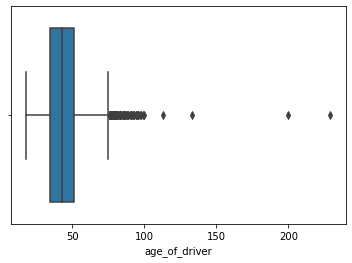

In [25]:
sns.boxplot(df['age_of_driver'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='safty_rating'>

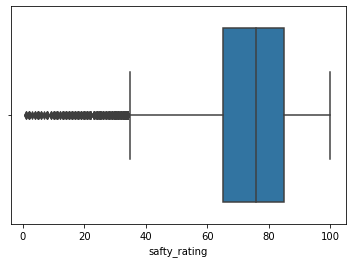

In [26]:
sns.boxplot(df['safty_rating'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_income'>

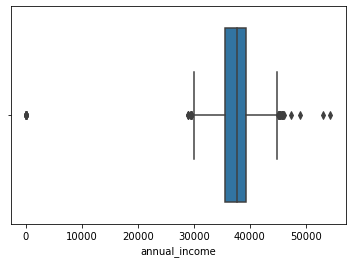

In [27]:
sns.boxplot(df['annual_income'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='liab_prct'>

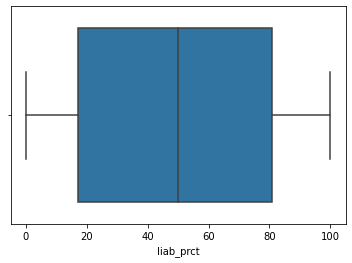

In [28]:
sns.boxplot(df['liab_prct'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='claim_est_payout'>

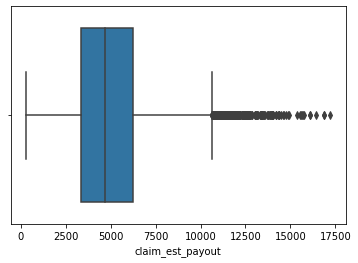

In [29]:
sns.boxplot(df['claim_est_payout'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_of_vehicle'>

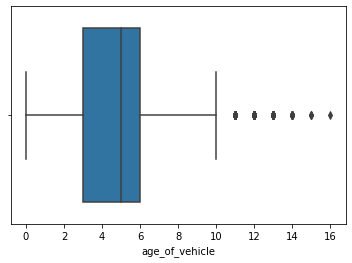

In [30]:
sns.boxplot(df['age_of_vehicle'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicle_price'>

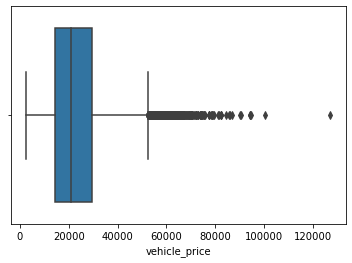

In [31]:
sns.boxplot(df['vehicle_price'])

# Data Visualization

# Categorical

<AxesSubplot:xlabel='gender', ylabel='count'>

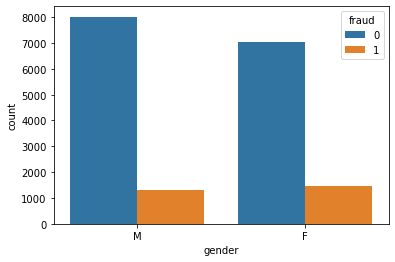

In [32]:
# gender (Categorical)
sns.countplot(hue='fraud', x='gender', data=df)

<AxesSubplot:xlabel='marital_status', ylabel='count'>

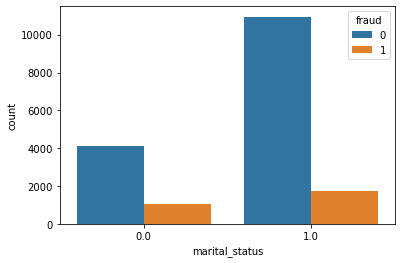

In [33]:
# marital_status (Categorical)
sns.countplot(hue='fraud', x='marital_status', data=df)

<AxesSubplot:xlabel='high_education_ind', ylabel='count'>

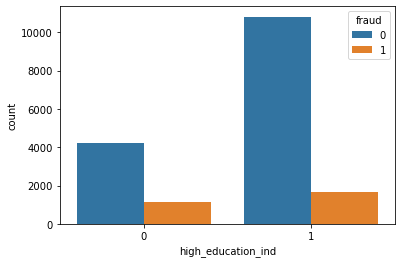

In [34]:
# high_education_ind (Categorical)
sns.countplot(hue='fraud', x='high_education_ind', data=df)

<AxesSubplot:xlabel='address_change_ind', ylabel='count'>

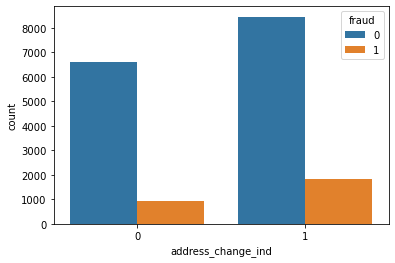

In [35]:
# address_change_ind (Categorical)
sns.countplot(hue='fraud', x='address_change_ind', data=df)

<AxesSubplot:xlabel='living_status', ylabel='count'>

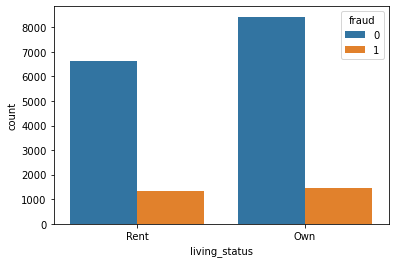

In [36]:
# living_status (Categorical)
sns.countplot(hue='fraud', x='living_status', data=df)

<AxesSubplot:xlabel='claim_day_of_week', ylabel='count'>

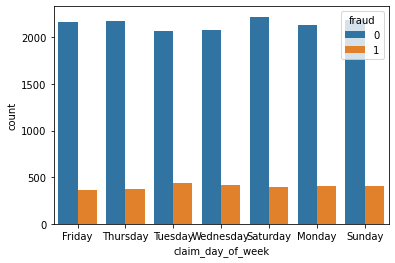

In [37]:
# claim_day_of_week (Categorical)
sns.countplot(hue='fraud', x='claim_day_of_week', data=df)

<AxesSubplot:xlabel='accident_site', ylabel='count'>

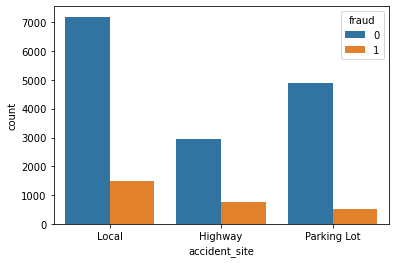

In [38]:
# accident_site (Categorical)
sns.countplot(hue='fraud', x='accident_site', data=df)

<AxesSubplot:xlabel='past_num_of_claims', ylabel='count'>

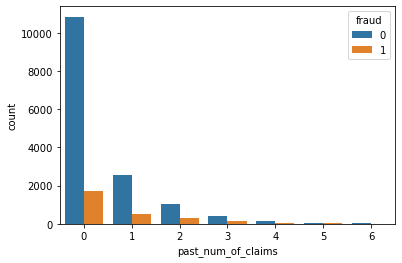

In [39]:
# past_num_of_claims (Categorical)
sns.countplot(hue='fraud', x='past_num_of_claims', data=df)

<AxesSubplot:xlabel='witness_present_ind', ylabel='count'>

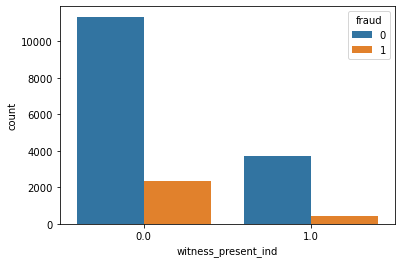

In [40]:
# witness_present_ind (Categorical)
sns.countplot(hue='fraud', x='witness_present_ind', data=df)

<AxesSubplot:xlabel='channel', ylabel='count'>

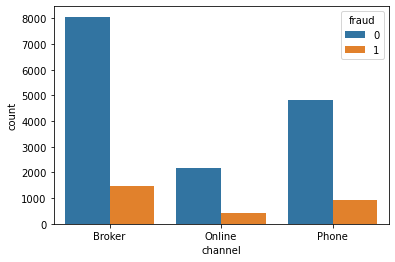

In [41]:
# channel (Categorical)
sns.countplot(hue='fraud', x='channel', data=df)

<AxesSubplot:xlabel='policy_report_filed_ind', ylabel='count'>

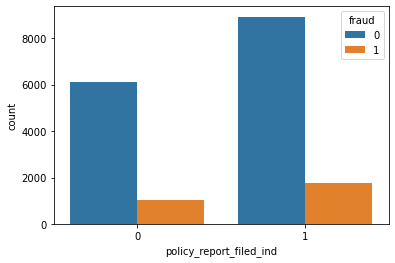

In [42]:
# policy_report_filed_ind (Categorical)
sns.countplot(hue='fraud', x='policy_report_filed_ind', data=df)

<AxesSubplot:xlabel='vehicle_category', ylabel='count'>

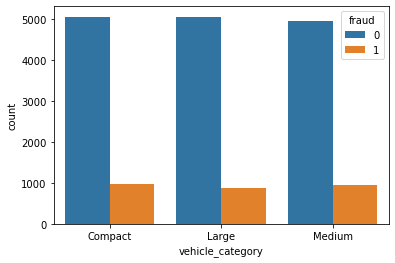

In [43]:
# vehicle_category (Categorical)
sns.countplot(hue='fraud', x='vehicle_category', data=df)

<AxesSubplot:xlabel='vehicle_color', ylabel='count'>

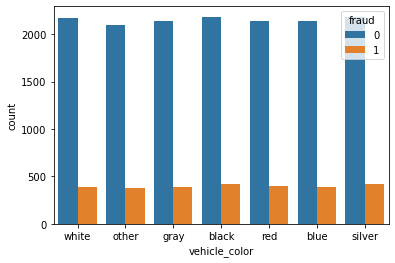

In [44]:
# vehicle_color (Categorical)
sns.countplot(hue='fraud', x='vehicle_color', data=df)

# Continuous

<AxesSubplot:xlabel='fraud', ylabel='age_of_driver'>

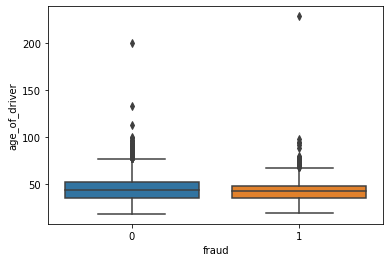

In [45]:
# age_of_driver (Continuous)
sns.boxplot(y='age_of_driver', x='fraud', data=df)

<AxesSubplot:xlabel='fraud', ylabel='safty_rating'>

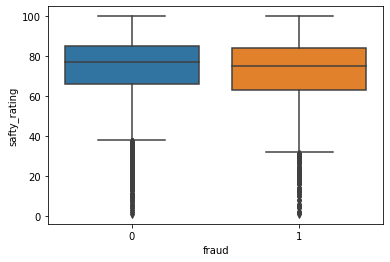

In [46]:
# safety_rating (Continuous)
sns.boxplot(y='safty_rating', x='fraud', data=df)

<AxesSubplot:xlabel='fraud', ylabel='annual_income'>

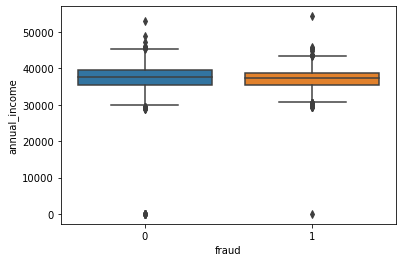

In [47]:
# annual_income (Continuous)
sns.boxplot(y='annual_income', x='fraud', data=df)

<AxesSubplot:xlabel='fraud', ylabel='liab_prct'>

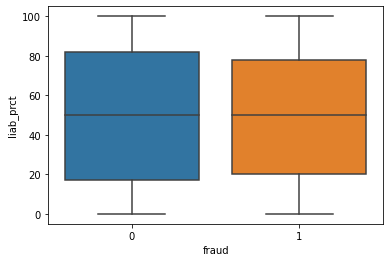

In [48]:
# liab_prct (Continuous)
sns.boxplot(y='liab_prct', x='fraud', data=df)

<AxesSubplot:xlabel='fraud', ylabel='claim_est_payout'>

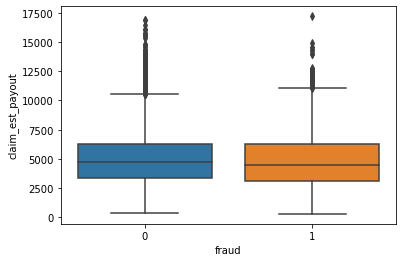

In [49]:
# claim_est_payout (Continuous)
sns.boxplot(y='claim_est_payout', x='fraud', data=df)

<AxesSubplot:xlabel='fraud', ylabel='age_of_vehicle'>

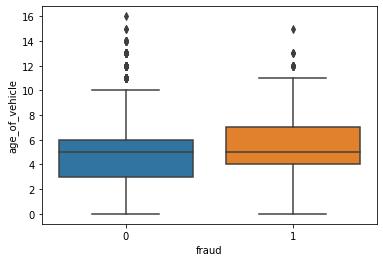

In [50]:
# age_of_vehicle (Continuous)
sns.boxplot(y='age_of_vehicle', x='fraud', data=df)

<AxesSubplot:xlabel='fraud', ylabel='vehicle_price'>

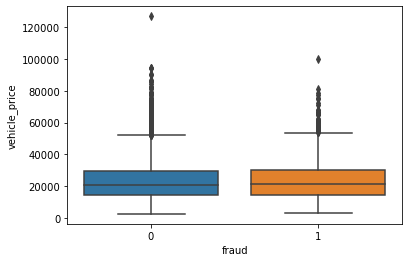

In [51]:
# vehicle_price (Continuous)
sns.boxplot(y='vehicle_price', x='fraud', data=df)

<AxesSubplot:xlabel='fraud', ylabel='vehicle_weight'>

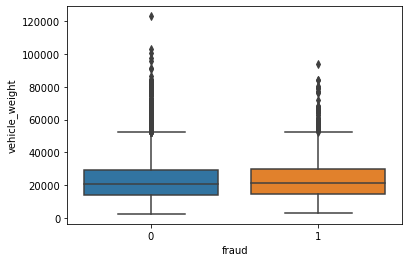

In [52]:
# vehicle_weight (Continuous)
sns.boxplot(y='vehicle_weight', x='fraud', data=df)

In [53]:
q1 = df[['age_of_driver', 'safty_rating', 'annual_income', 'liab_prct', 'claim_est_payout', 'age_of_vehicle', 'vehicle_price', 'vehicle_weight']].quantile(0.25)
q3 = df[['age_of_driver', 'safty_rating', 'annual_income', 'liab_prct', 'claim_est_payout', 'age_of_vehicle', 'vehicle_price', 'vehicle_weight']].quantile(0.75)
iqr = q3 - q1

In [54]:
((df[['age_of_driver', 'safty_rating', 'annual_income', 'liab_prct', 'claim_est_payout', 'age_of_vehicle', 'vehicle_price']] < (q1 - 1.5 * iqr)) | (df[['age_of_driver', 'safty_rating', 'annual_income', 'liab_prct', 'claim_est_payout', 'age_of_vehicle', 'vehicle_price']] > (q3 + 1.5 * iqr))).sum()

<ipython-input-54-eed068037d5d>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df[['age_of_driver', 'safty_rating', 'annual_income', 'liab_prct', 'claim_est_payout', 'age_of_vehicle', 'vehicle_price']] < (q1 - 1.5 * iqr)) | (df[['age_of_driver', 'safty_rating', 'annual_income', 'liab_prct', 'claim_est_payout', 'age_of_vehicle', 'vehicle_price']] > (q3 + 1.5 * iqr))).sum()
<ipython-input-54-eed068037d5d>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df[['age_of_driver', 'safty_rating', 'annual_income', 'liab_prct', 'claim_est_payout', 'age_of_vehicle', 'vehicle_price']] < (q1 - 1.5 * iqr)) | (df[['age_of_driver', 'safty_rating', 'annual

age_of_driver       181
age_of_vehicle      266
annual_income        57
claim_est_payout    319
liab_prct             0
safty_rating        397
vehicle_price       459
vehicle_weight        0
dtype: int64

In [55]:
df.drop(df.loc[df['age_of_driver'] > 95].index, axis=0, inplace=True)

In [56]:
df['safty_rating'].min(), df['safty_rating'].max()

(1, 100)

In [57]:
# annual_income outliers
q1_ai = df[['annual_income']].quantile(0.25)
q3_ai = df[['annual_income']].quantile(0.75)
iqr_ai = q3_ai - q1_ai

In [58]:
lq_ai = q1_ai - 1.5 * iqr_ai
uq_ai = q3_ai + 1.5 * iqr_ai

In [59]:
df.loc[df['annual_income'] < lq_ai[0], ['annual_income', 'fraud']]

,annual_income,fraud
257,29447,1
645,29441,0
1428,29444,0
3144,29451,1
3442,-1,0
5449,-1,1
5570,29434,0
5690,29453,1
6074,29444,0
6785,28906,0


In [60]:
# deleted -1 values as income cannot be -1
df.drop(df.loc[df['annual_income'] == -1].index, axis=0, inplace=True)

In [61]:
df.loc[df['annual_income'] > uq_ai[0], ['annual_income', 'fraud']]

,annual_income,fraud
319,45112,0
1304,45205,0
3989,45566,1
4788,45219,0
4927,45202,1
6431,45433,1
9796,44985,0
10466,45106,0
11023,45097,0
12900,45208,0


In [62]:
# claim_est_payout outliers
q1_cep = df[['claim_est_payout']].quantile(0.25)
q3_cep = df[['claim_est_payout']].quantile(0.75)
iqr_cep = q3_cep - q1_cep
lq_cep = q1_cep - 1.5 * iqr_cep
uq_cep = q3_cep + 1.5 * iqr_cep

In [63]:
df.loc[df['claim_est_payout'] < lq_cep[0], ['claim_est_payout', 'fraud']]

,claim_est_payout,fraud


In [64]:
df.loc[df['claim_est_payout'] > uq_cep[0], ['fraud']].value_counts()

fraud
0        264
1         55
dtype: int64

In [65]:
df['claim_est_payout'].min(), df['claim_est_payout'].max()

(282.639432, 17218.34501)

In [66]:
# vehicle_price outliers
q1_vp = df[['vehicle_price']].quantile(0.25)
q3_vp = df[['vehicle_price']].quantile(0.75)
iqr_vp = q3_vp - q1_vp
lq_vp = q1_vp - 1.5 * iqr_vp
uq_vp = q3_vp + 1.5 * iqr_vp

In [67]:
df.loc[df['vehicle_price'] < lq_vp[0], ['vehicle_price', 'fraud']]

,vehicle_price,fraud


In [68]:
df.loc[df['vehicle_price'] > uq_vp[0], ['fraud']].value_counts()

fraud
0        391
1         68
dtype: int64

In [69]:
df['vehicle_price'].min(), df['vehicle_price'].max()

(2457.329316, 127063.506)

In [70]:
# vehicle_weight outliers
q1_vw = df[['vehicle_weight']].quantile(0.25)
q3_vw = df[['vehicle_weight']].quantile(0.75)
iqr_vw = q3_vw - q1_vw
lq_vw = q1_vw - 1.5 * iqr_vw
uq_vw = q3_vw + 1.5 * iqr_vw

In [71]:
df.loc[df['vehicle_weight'] < lq_vw[0], ['vehicle_weight', 'fraud']]

,vehicle_weight,fraud


In [72]:
df.loc[df['vehicle_weight'] > uq_vp[0], ['fraud']].value_counts()

fraud
0        360
1         69
dtype: int64

In [73]:
# Deleting unnecessary columns
df.drop(['claim_day_of_week', 'vehicle_category', 'vehicle_color', 'vehicle_weight', 'claim_number', 'zip_code'], axis=1, inplace=True)

In [74]:
df.columns

Index(['age_of_driver', 'gender', 'marital_status', 'safty_rating',
       'annual_income', 'high_education_ind', 'address_change_ind',
       'living_status', 'claim_date', 'accident_site', 'past_num_of_claims',
       'witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_price', 'fraud'],
      dtype='object')

In [75]:
just_dummies = pd.get_dummies(df[['gender', 'living_status', 'accident_site', 'channel']])

In [76]:
df_with_dummies = pd.concat([df, just_dummies], axis=1)

In [77]:
df_with_dummies.drop(['gender', 'living_status', 'accident_site', 'channel', 'claim_date'], axis=1, inplace=True)

In [78]:
df_with_dummies.columns

Index(['age_of_driver', 'marital_status', 'safty_rating', 'annual_income',
       'high_education_ind', 'address_change_ind', 'past_num_of_claims',
       'witness_present_ind', 'liab_prct', 'policy_report_filed_ind',
       'claim_est_payout', 'age_of_vehicle', 'vehicle_price', 'fraud',
       'gender_F', 'gender_M', 'living_status_Own', 'living_status_Rent',
       'accident_site_Highway', 'accident_site_Local',
       'accident_site_Parking Lot', 'channel_Broker', 'channel_Online',
       'channel_Phone'],
      dtype='object')

In [81]:
df.dtypes
#df_with_dummies.dtypes

age_of_driver                int64
gender                      object
marital_status             float64
safty_rating                 int64
annual_income                int64
high_education_ind           int64
address_change_ind           int64
living_status               object
claim_date                  object
accident_site               object
past_num_of_claims           int64
witness_present_ind        float64
liab_prct                    int64
channel                     object
policy_report_filed_ind      int64
claim_est_payout           float64
age_of_vehicle             float64
vehicle_price              float64
fraud                        int64
dtype: object

# Modelling

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
import xgboost as xgb

In [79]:
X = df_with_dummies.drop('fraud', axis=1)
y = df_with_dummies['fraud']

In [80]:
from imblearn.under_sampling import RandomUnderSampler

In [81]:
rus = RandomUnderSampler(random_state=42, replacement=True)
X_rus, y_rus = rus.fit_resample(X,y)

In [82]:
X_rus.shape, y_rus.shape

((5586, 23), (5586,))

In [83]:
df2 = pd.read_csv('test_2021.csv')

In [84]:
df2.shape

(12002, 24)

In [85]:
df2.isna().sum()

claim_number                0
age_of_driver               0
gender                      0
marital_status              2
safty_rating                0
annual_income               0
high_education_ind          0
address_change_ind          0
living_status               0
zip_code                    0
claim_date                  0
claim_day_of_week           0
accident_site               0
past_num_of_claims          0
witness_present_ind        88
liab_prct                   0
channel                     0
policy_report_filed_ind     0
claim_est_payout           14
age_of_vehicle              3
vehicle_category            0
vehicle_price               0
vehicle_color               0
vehicle_weight              0
dtype: int64

In [86]:
df['marital_status'].mode()[0]

1.0

In [87]:
df['claim_est_payout'].mean()

4975.947675682614

In [88]:
df2['marital_status'].fillna(df['marital_status'].mode()[0], inplace=True)
df2['witness_present_ind'].fillna(df['witness_present_ind'].mode()[0], inplace=True)
df2['claim_est_payout'].fillna(df['claim_est_payout'].mean(), inplace=True)
df2['age_of_vehicle'].fillna(df['age_of_vehicle'].mean(), inplace=True)

In [89]:
df2.drop(['claim_day_of_week', 'vehicle_category', 'vehicle_color', 'vehicle_weight', 'zip_code'], axis=1, inplace=True)

In [90]:
just_dummies_2 = pd.get_dummies(df2[['gender', 'living_status', 'accident_site', 'channel']])

In [91]:
df_with_dummies_2 = pd.concat([df2, just_dummies_2], axis=1)

In [92]:
df_with_dummies_2.drop(['gender', 'living_status', 'accident_site', 'channel', 'claim_date', 'claim_number'], axis=1, inplace=True)

In [93]:
df_with_dummies_2.columns

Index(['age_of_driver', 'marital_status', 'safty_rating', 'annual_income',
       'high_education_ind', 'address_change_ind', 'past_num_of_claims',
       'witness_present_ind', 'liab_prct', 'policy_report_filed_ind',
       'claim_est_payout', 'age_of_vehicle', 'vehicle_price', 'gender_F',
       'gender_M', 'living_status_Own', 'living_status_Rent',
       'accident_site_Highway', 'accident_site_Local',
       'accident_site_Parking Lot', 'channel_Broker', 'channel_Online',
       'channel_Phone'],
      dtype='object')

In [94]:
df_with_dummies_2.dtypes

age_of_driver                  int64
marital_status               float64
safty_rating                   int64
annual_income                  int64
high_education_ind             int64
address_change_ind             int64
past_num_of_claims             int64
witness_present_ind          float64
liab_prct                      int64
policy_report_filed_ind        int64
claim_est_payout             float64
age_of_vehicle               float64
vehicle_price                float64
gender_F                       uint8
gender_M                       uint8
living_status_Own              uint8
living_status_Rent             uint8
accident_site_Highway          uint8
accident_site_Local            uint8
accident_site_Parking Lot      uint8
channel_Broker                 uint8
channel_Online                 uint8
channel_Phone                  uint8
dtype: object

In [95]:
df_with_dummies_2.isna().sum()

age_of_driver                0
marital_status               0
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
past_num_of_claims           0
witness_present_ind          0
liab_prct                    0
policy_report_filed_ind      0
claim_est_payout             0
age_of_vehicle               0
vehicle_price                0
gender_F                     0
gender_M                     0
living_status_Own            0
living_status_Rent           0
accident_site_Highway        0
accident_site_Local          0
accident_site_Parking Lot    0
channel_Broker               0
channel_Online               0
channel_Phone                0
dtype: int64

In [96]:
model = LogisticRegression(random_state=1)
model.fit(X_rus, y_rus)

y_pred = model.predict(df_with_dummies_2)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
y_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [98]:
model2 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model2.fit(X_rus, y_rus)

y_pred2 = model2.predict(df_with_dummies_2)

E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:40:59] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [99]:
y_pred2

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [100]:
df2['claim_number'].values

array([    2,     9,    11, ..., 29994, 29995, 29998], dtype=int64)

In [101]:
y_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [102]:
# Logistic Regression Submission
submission_1 = pd.DataFrame({'claim_number': df2['claim_number'].values, 'pred': y_pred})

In [103]:
submission_1.to_csv('submission_1', encoding='utf-8', index=False)

In [104]:
# xgboost submission
submission_2 = pd.DataFrame({'claim_number': df2['claim_number'].values, 'pred': y_pred2})

In [105]:
submission_2.to_csv('submission_2', encoding='utf-8', index=False)

In [106]:
params = {
        'min_samples_leaf': [1, 3, 5],
        'min_samples_split': [2, 3, 5],
         'n_estimators': [10, 20, 50, 100],
        'max_depth': [3, 5, 8],
        'max_features': [5, 10, 25],
        'bootstrap': [True]
        }

rf = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV
# folds = 3
# param_comb = 5
# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
# random_search = RandomizedSearchCV(rf, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# grid_search = GridSearchCV(rf, param_distributions=params, scoring='roc_auc', n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

grid_search = GridSearchCV(rf, params, scoring='roc_auc', n_jobs=2, cv=5, verbose=3)

# start_time = timer(None)
grid_search.fit(X_rus, y_rus)
# timer(start_time)

# Here we go
# start_time = timer(None)
# random_search.fit(X, Y)
# timer(start_time)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.67686864 0.68363648 0.69060243 0.6894568  0.67805623 0.68775258
 0.68685218 0.69061651 0.67288337 0.6833953  0.69074702 0.69054132
 0.67426169 0.68444257 0.68941932 0.69281258 0.67441141 0.68830041
 0.68910286 0.69121633 0.68316583 0.68912096 0.6904153  0.69040404
 0.68143197 0.68313913 0.68930712 0.68984473 0.68377956 0.69136684
 0.68845676 0.69346713 0.68192602 0.68487692 0.69036545 0.69368675
 0.68055817 0.67544891 0.67977027 0.68212728 0.67477581 0.68077576
 0.6818336  0.68125723 0.67693065 0.68052559 0.67805777 0.68404436
 0.67229425 0.67858944 0.6819218  0.68304238 0.67742508 0.67790643
 0.67820034 0.68067349 0.67113016 0.68110247 0.68303816 0.68301082
 0.67730936 0.68149241 0.68123873 0.68074861 0.6738471  0.67755133
 0.68286187 0.68301711 0.67334754 0.67890794 0.67858468 0.68331525
        nan        nan        nan        nan        nan        nan

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'bootstrap': [True], 'max_depth': [3, 5, 8],
                         'max_features': [5, 10, 25],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='roc_auc', verbose=3)

In [107]:
y_pred3 = grid_search.predict(df_with_dummies_2)
y_pred3

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [108]:
# rf with parameter tuning
submission_3 = pd.DataFrame({'claim_number': df2['claim_number'].values, 'pred': y_pred3})

In [109]:
submission_3.to_csv('submission_3', encoding='utf-8', index=False)

In [110]:
params2 = {
         'min_child_weight': [1, 5, 10, 11],
         'gamma': [0.5, 1, 1.5, 2, 5],
         'subsample': [0.6, 0.8, 1.0],
         'colsample_bytree': [0.6, 0.8, 1.0],
         'max_depth': [3, 4, 5],
         'n_estimators': [1000],
         'learning_rate': [0.05]
         }

model3 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

grid_search2 = GridSearchCV(model3, params2, scoring='roc_auc', n_jobs=5, cv=5, verbose=2, refit=True)

grid_search2.fit(X_rus, y_rus)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:24:38] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, ver

In [111]:
y_pred4 = grid_search2.predict(df_with_dummies_2)
y_pred4

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [112]:
submission_4 = pd.DataFrame({'claim_number': df2['claim_number'].values, 'pred': y_pred4})

In [113]:
submission_4.to_csv('submission_4', encoding='utf-8', index=False)